In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [3]:
# read data from csv file
trainset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/trainset.csv')
testset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/testset.csv')
print(trainset.shape)
print(testset.shape)

(80000, 15)
(20000, 15)


In [4]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.341575,1.159034,0.012636,0.451710,0.794808,0.347226,0.116634,0.755911,0.674340,1.359338,0.3233,1.1590,0.02901,0.4719,0.79480
1,0.638607,0.558054,1.231009,0.243433,1.132821,0.038278,0.185744,0.734268,1.464984,1.489907,0.4584,0.5581,1.24700,0.5882,1.13300
2,0.787981,0.763241,0.349968,0.738449,1.452716,1.117356,0.110285,0.393380,0.282715,1.466671,0.8053,0.7632,0.34980,0.7038,1.45300
3,0.466115,0.948450,0.942671,1.051085,1.358636,0.470234,0.252135,0.914662,1.318543,1.076570,0.4558,0.9484,0.94180,1.0730,1.35900
4,0.452663,0.644895,1.360873,0.991130,0.162887,1.361588,1.475943,0.637112,0.397679,1.414160,0.4939,0.6449,1.34300,0.9266,0.16290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.796601,0.398041,1.132371,0.996845,0.094560,1.074895,1.055513,0.777877,0.870241,0.361988,0.8083,0.3980,1.12600,0.9802,0.09456
79996,0.942419,1.456538,1.164360,0.775981,0.069458,1.024540,1.025283,0.144121,1.438743,0.241862,0.9305,1.4570,1.15000,0.8141,0.06946
79997,1.095302,0.438446,1.335379,0.365207,0.273701,0.765942,0.880543,1.152310,1.119219,1.104459,1.0670,0.4384,1.33500,0.4223,0.27370
79998,0.310626,0.661302,0.192742,1.280823,0.931653,0.199012,0.072267,0.870017,0.563615,0.006399,0.3275,0.6613,0.21380,1.2260,0.93170


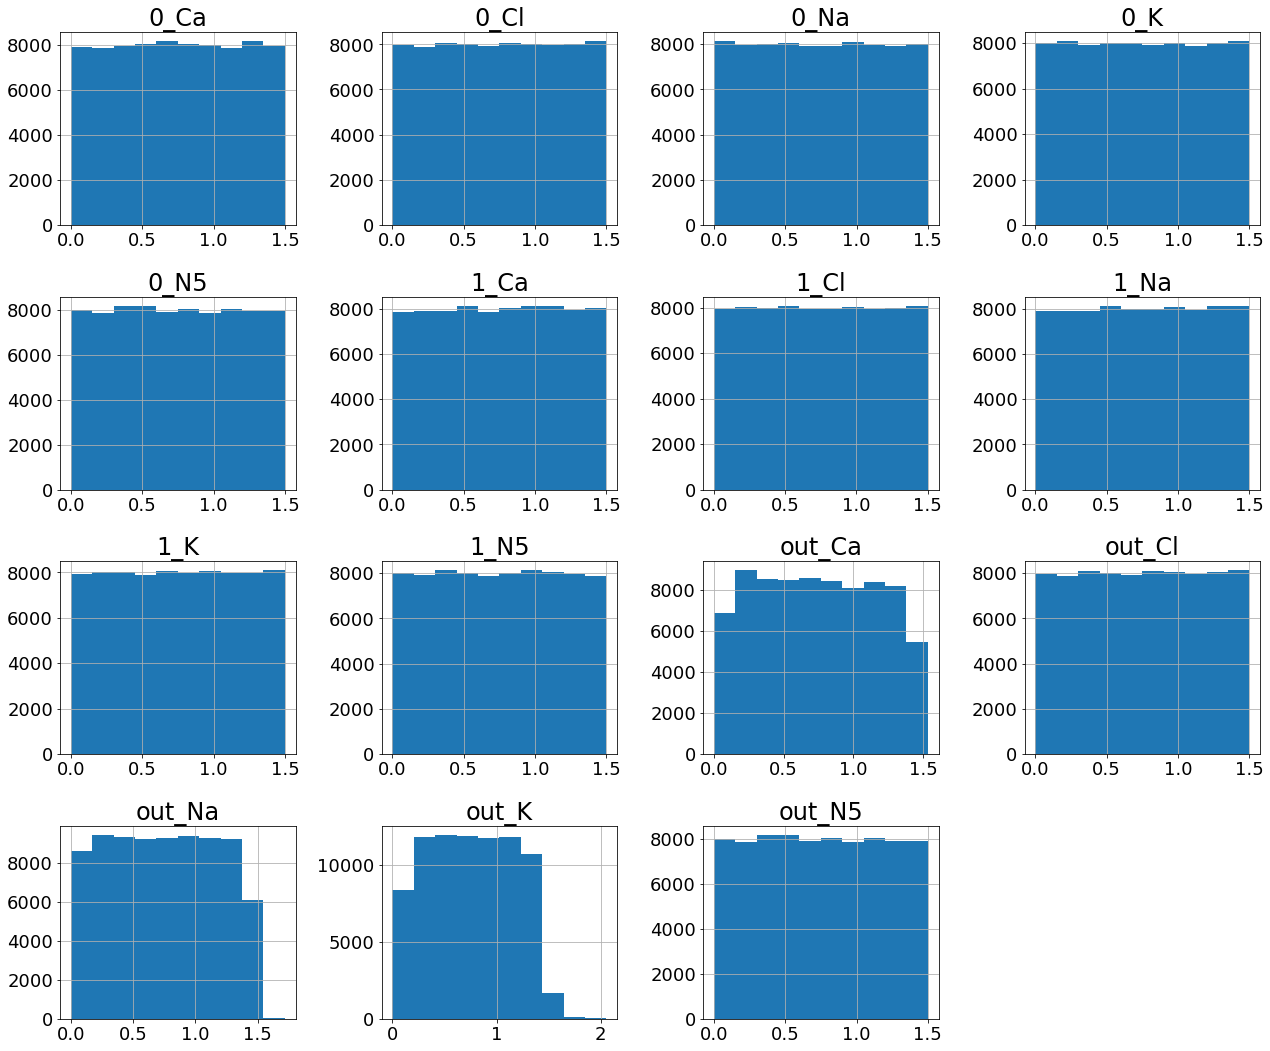

In [5]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [6]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [10, 12, 13]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [10, 12, 13]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [10, 12, 13]] # do not work for list -> list(trainset)[10, 12, 13]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [8]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('X_val instances: ', X_val.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)
print('y_val instances: ', y_val.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca', 'out_Na', 'out_K']
X_train instances:  (64000, 6)
X_test instances:  (20000, 6)
X_val instances:  (16000, 6)
y_train instances:  (64000, 3)
y_test instances:  (20000, 3)
y_val instances:  (16000, 3)


## Normalize data

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

norm_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler((-1,1))),
    ])

X_train_norm = norm_pipeline.fit_transform(X_train)
X_test_norm = norm_pipeline.transform(X_test)
X_val_norm = norm_pipeline.transform(X_val)

# TabNet

https://github.com/dreamquark-ai/tabnet

In [10]:
# Requirements:
!pip install pytorch-tabnet

In [41]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

tabnet_reg = TabNetRegressor(device_name='auto',
                            n_steps=4,
                            n_d=32,
                            n_a=32,
                            gamma=1.1,
                            lambda_sparse=0.0001,
                            verbose=1,
                           )

start = time.time()
tabnet_reg.fit(X_train_norm, 
               y_train,
               eval_set=[(X_val_norm, y_val)],
               eval_metric=['rmse', 'mse'],
               max_epochs=1000,
               patience=100,
               )
print("time = ", time.time()-start)

Device used : cuda
epoch 0  | loss: 0.17594 | val_0_rmse: 0.15043 | val_0_mse: 0.02263 |  0:00:03s
epoch 1  | loss: 0.01165 | val_0_rmse: 0.10858 | val_0_mse: 0.01179 |  0:00:06s
epoch 2  | loss: 0.0083  | val_0_rmse: 0.08512 | val_0_mse: 0.00725 |  0:00:09s
epoch 3  | loss: 0.00617 | val_0_rmse: 0.06945 | val_0_mse: 0.00482 |  0:00:13s
epoch 4  | loss: 0.0052  | val_0_rmse: 0.06352 | val_0_mse: 0.00403 |  0:00:16s
epoch 5  | loss: 0.00457 | val_0_rmse: 0.05423 | val_0_mse: 0.00294 |  0:00:19s
epoch 6  | loss: 0.00415 | val_0_rmse: 0.05561 | val_0_mse: 0.00309 |  0:00:22s
epoch 7  | loss: 0.00409 | val_0_rmse: 0.04267 | val_0_mse: 0.00182 |  0:00:25s
epoch 8  | loss: 0.00386 | val_0_rmse: 0.06297 | val_0_mse: 0.00397 |  0:00:28s
epoch 9  | loss: 0.00381 | val_0_rmse: 0.05306 | val_0_mse: 0.00282 |  0:00:31s
epoch 10 | loss: 0.00329 | val_0_rmse: 0.04248 | val_0_mse: 0.0018  |  0:00:35s
epoch 11 | loss: 0.00326 | val_0_rmse: 0.03511 | val_0_mse: 0.00123 |  0:00:38s
epoch 12 | loss: 0.00

epoch 103| loss: 0.00091 | val_0_rmse: 0.03546 | val_0_mse: 0.00126 |  0:05:33s
epoch 104| loss: 0.00111 | val_0_rmse: 0.02735 | val_0_mse: 0.00075 |  0:05:36s
epoch 105| loss: 0.00086 | val_0_rmse: 0.02749 | val_0_mse: 0.00076 |  0:05:39s
epoch 106| loss: 0.00089 | val_0_rmse: 0.02273 | val_0_mse: 0.00052 |  0:05:42s
epoch 107| loss: 0.00105 | val_0_rmse: 0.01785 | val_0_mse: 0.00032 |  0:05:46s
epoch 108| loss: 0.00085 | val_0_rmse: 0.02878 | val_0_mse: 0.00083 |  0:05:49s
epoch 109| loss: 0.00084 | val_0_rmse: 0.02025 | val_0_mse: 0.00041 |  0:05:52s
epoch 110| loss: 0.0008  | val_0_rmse: 0.02241 | val_0_mse: 0.0005  |  0:05:55s
epoch 111| loss: 0.00095 | val_0_rmse: 0.04185 | val_0_mse: 0.00175 |  0:05:58s
epoch 112| loss: 0.0009  | val_0_rmse: 0.02028 | val_0_mse: 0.00041 |  0:06:01s
epoch 113| loss: 0.0008  | val_0_rmse: 0.02523 | val_0_mse: 0.00064 |  0:06:04s
epoch 114| loss: 0.00082 | val_0_rmse: 0.04216 | val_0_mse: 0.00178 |  0:06:07s
epoch 115| loss: 0.00089 | val_0_rmse: 0

epoch 206| loss: 0.00061 | val_0_rmse: 0.02337 | val_0_mse: 0.00055 |  0:11:01s
epoch 207| loss: 0.00044 | val_0_rmse: 0.01871 | val_0_mse: 0.00035 |  0:11:05s
epoch 208| loss: 0.00059 | val_0_rmse: 0.02333 | val_0_mse: 0.00054 |  0:11:08s
epoch 209| loss: 0.00062 | val_0_rmse: 0.02807 | val_0_mse: 0.00079 |  0:11:11s
epoch 210| loss: 0.00055 | val_0_rmse: 0.01739 | val_0_mse: 0.0003  |  0:11:15s
epoch 211| loss: 0.00051 | val_0_rmse: 0.02042 | val_0_mse: 0.00042 |  0:11:18s
epoch 212| loss: 0.00061 | val_0_rmse: 0.02582 | val_0_mse: 0.00067 |  0:11:21s
epoch 213| loss: 0.00067 | val_0_rmse: 0.02125 | val_0_mse: 0.00045 |  0:11:24s
epoch 214| loss: 0.00057 | val_0_rmse: 0.02    | val_0_mse: 0.0004  |  0:11:27s
epoch 215| loss: 0.00053 | val_0_rmse: 0.02242 | val_0_mse: 0.0005  |  0:11:30s
epoch 216| loss: 0.0006  | val_0_rmse: 0.02138 | val_0_mse: 0.00046 |  0:11:33s
epoch 217| loss: 0.00069 | val_0_rmse: 0.03216 | val_0_mse: 0.00103 |  0:11:36s
epoch 218| loss: 0.0007  | val_0_rmse: 0

epoch 309| loss: 0.00039 | val_0_rmse: 0.01749 | val_0_mse: 0.00031 |  0:16:31s
epoch 310| loss: 0.00041 | val_0_rmse: 0.01475 | val_0_mse: 0.00022 |  0:16:34s
epoch 311| loss: 0.0004  | val_0_rmse: 0.02198 | val_0_mse: 0.00048 |  0:16:37s
epoch 312| loss: 0.00047 | val_0_rmse: 0.03273 | val_0_mse: 0.00107 |  0:16:41s
epoch 313| loss: 0.00059 | val_0_rmse: 0.24552 | val_0_mse: 0.06028 |  0:16:44s
epoch 314| loss: 0.00047 | val_0_rmse: 0.02391 | val_0_mse: 0.00057 |  0:16:47s
epoch 315| loss: 0.00042 | val_0_rmse: 0.03933 | val_0_mse: 0.00155 |  0:16:50s
epoch 316| loss: 0.00042 | val_0_rmse: 0.10582 | val_0_mse: 0.0112  |  0:16:53s
epoch 317| loss: 0.0004  | val_0_rmse: 0.01493 | val_0_mse: 0.00022 |  0:16:57s
epoch 318| loss: 0.00044 | val_0_rmse: 0.01608 | val_0_mse: 0.00026 |  0:17:00s
epoch 319| loss: 0.0004  | val_0_rmse: 0.02759 | val_0_mse: 0.00076 |  0:17:03s
epoch 320| loss: 0.00043 | val_0_rmse: 0.04869 | val_0_mse: 0.00237 |  0:17:06s
epoch 321| loss: 0.00036 | val_0_rmse: 0

In [42]:
reg_best = tabnet_reg

In [43]:
reg_best.feature_importances_

array([0.2120992 , 0.34042602, 0.19719306, 0.21499006, 0.00986999,
       0.02542168])

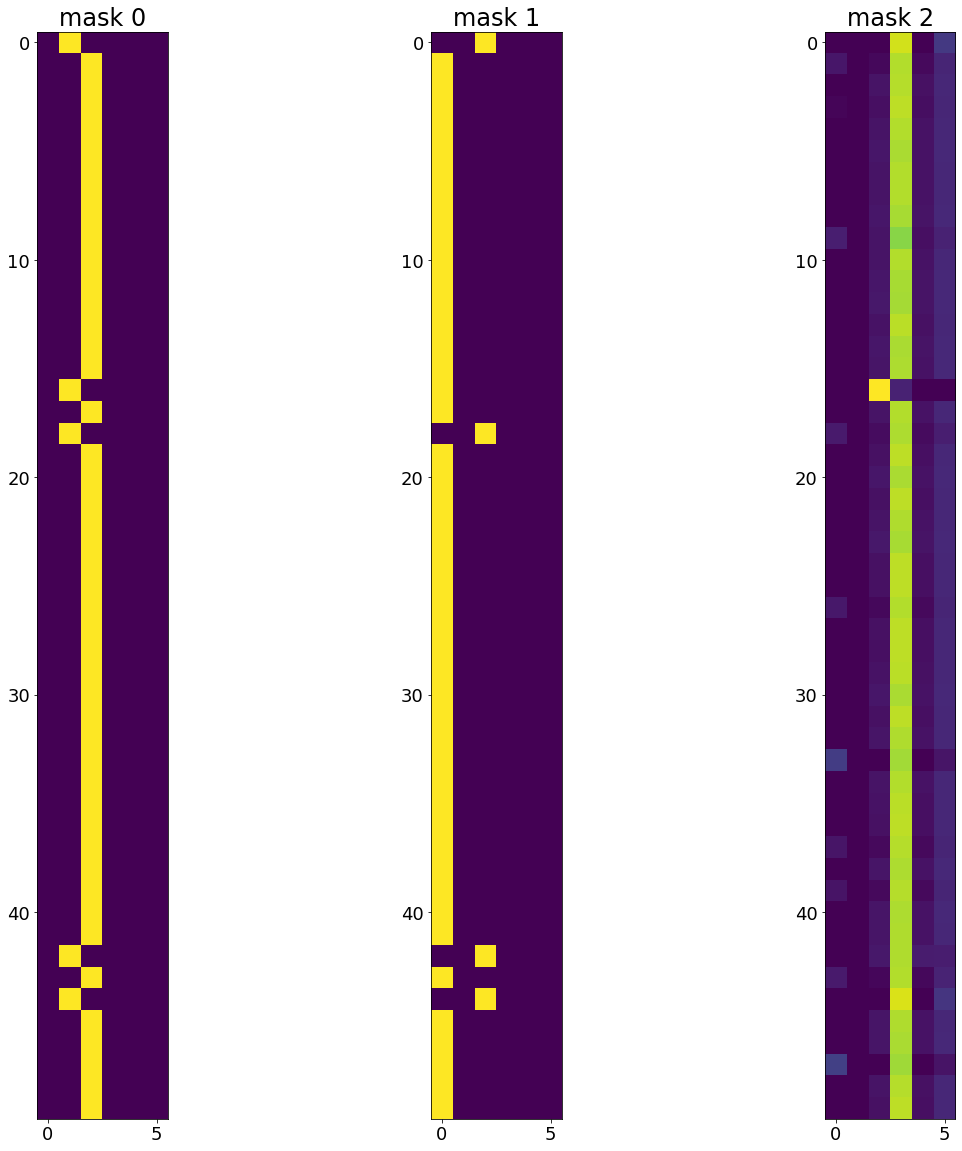

In [44]:
explain_matrix, masks = reg_best.explain(X_train_norm)

fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

start = time.time()
y_train_pred = reg_best.predict(X_train_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2_model = r2_score(y_train, y_train_pred)
print('\nR2: ',r2_model)

time =  -1.0172266960144043

mse:  0.0001306481349522383
rmse:  0.011430141510595496
mae:  0.0075627032322320735

R2:  0.9992440053283698


In [46]:
start = time.time()
y_test_pred = reg_best.predict(X_test_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2_model = r2_score(y_test, y_test_pred)
print('\nR2: ',r2_model)

time =  -0.42572665214538574

mse:  0.000131239584309105
rmse:  0.01145598465035219
mae:  0.007562576188758952

R2:  0.9992408130950556


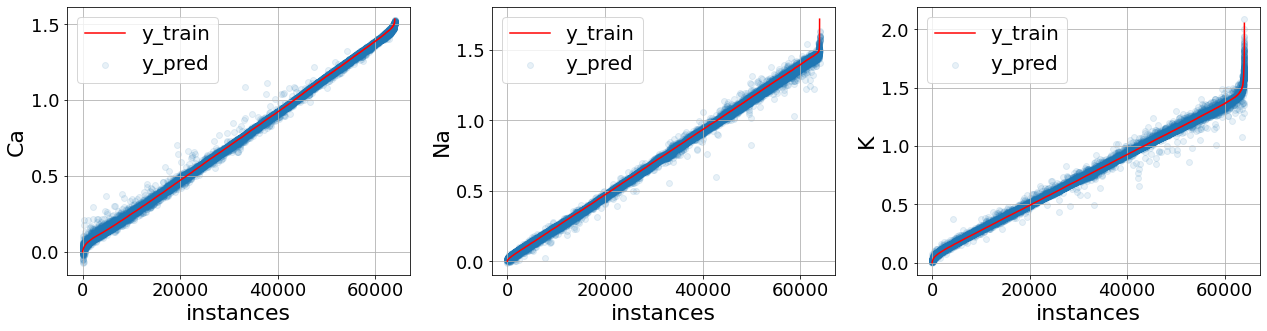

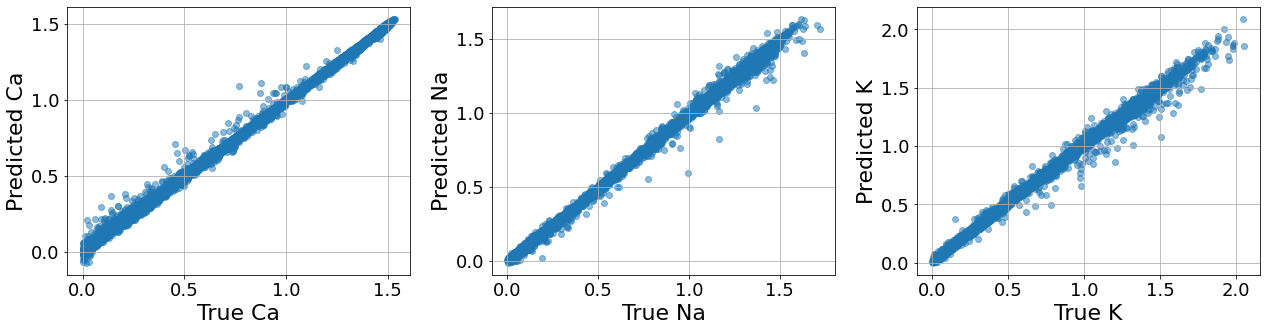

In [47]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]
    aux_pred = y_train_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i], y_train_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

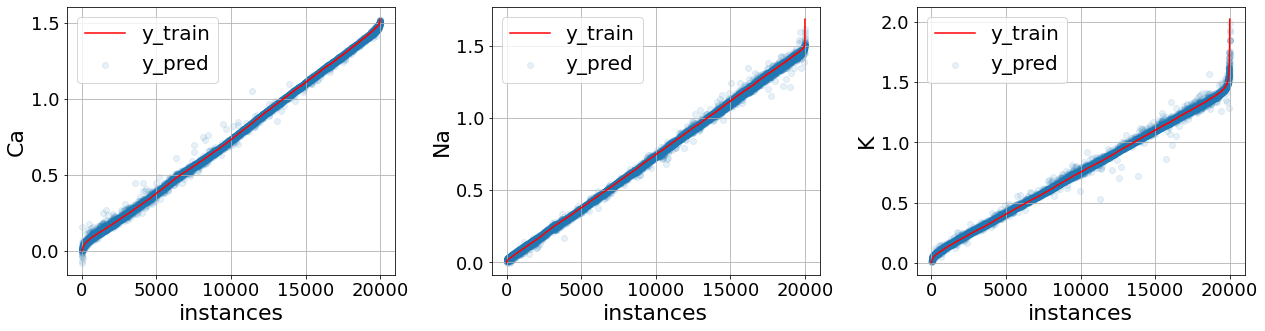

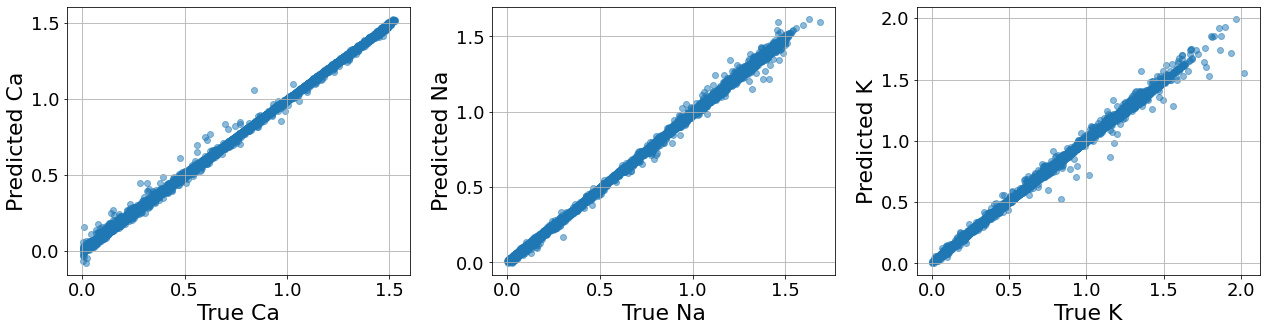

In [48]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]
    aux_pred = y_test_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i], y_test_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

## Checking charge constraint

In [49]:
charge_in = 2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]
charge_out = 2*y_train_pred[:, 0]+y_train_pred[:, 1]+y_train_pred[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.015120734100892829

In [50]:
charge_in = 2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]
charge_out = 2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.015091010632005077

## Run time

In [51]:
start = time.time()
for i in range(1000):  
    reg_best.predict(X_test_norm[0:1])
end = time.time()
print("time = ", (start - end)/1000)
print()

time =  -0.007123062133789063



## Model persistence

In [52]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import joblib
from sklearn.metrics import mean_squared_error


# save tabnet model
saved_filepath = reg_best.save_model('tabnet.tab')

# define new model with basic parameters and load state dict weights
model_l = TabNetRegressor(device_name='auto')
model_l.load_model(saved_filepath)

# Save and load the normalization
joblib.dump(norm_pipeline, "norm_pipeline.pkl") 
xnorm = joblib.load("norm_pipeline.pkl")


print('rmse: ', np.sqrt(mean_squared_error(y_test, 
                model_l.predict(xnorm.transform(X_test)))))

Successfully saved model at tabnet.tab.zip
Device used : cuda
Device used : cuda
rmse:  0.01145598465035219


In [53]:
# Add Physics-constrained

y_test_pred = model_l.predict(X_test_norm)
y_test_pred = (y_test_pred.T*(2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]) \
                         /(2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2])).T
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

rmse:  0.010541598428995588


In [54]:
start = time.time()
model_l = TabNetRegressor(device_name='cpu')
model_l.load_model(saved_filepath)
xnorm = joblib.load("norm_pipeline.pkl")
end_load = time.time()
print('Load time = ', end_load - start)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:1]))
print('Prediction time = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:1000]))
print('Prediction time 1000 = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:10000]))
print('Prediction time 10,000 = ', (time.time() - start)/1000)

Device used : cpu
Device used : cpu
Load time =  0.045339107513427734
Prediction time =  0.003987802743911743
Prediction time 1000 =  0.029862380027770995
Prediction time 10,000 =  0.2885443124771118


## GPU

In [55]:
start = time.time()
model_l = TabNetRegressor(device_name='auto')
model_l.load_model(saved_filepath)
xnorm = joblib.load("norm_pipeline.pkl")
end_load = time.time()
print('Load time = ', end_load - start)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:1]))
print('Prediction time = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:1000]))
print('Prediction time 1000 = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):    
    y_pred = model_l.predict(xnorm.transform(X_test[0:10000]))
print('Prediction time 10,000 = ', (time.time() - start)/1000)

Device used : cuda
Device used : cuda
Load time =  0.09430599212646484
Prediction time =  0.007248085498809814
Prediction time 1000 =  0.016846247673034668
Prediction time 10,000 =  0.16195490074157715
